In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Les inn dataene og konverter 'referenceTime'-kolonnen til datetime-format
df_oslo = pd.read_csv('../data/processed/vaerdata_oslo.csv')
df_tromso = pd.read_csv('../data/processed/vaerdata_tromso.csv')

df_oslo['referenceTime'] = pd.to_datetime(df_oslo['referenceTime'])
df_tromso['referenceTime'] = pd.to_datetime(df_tromso['referenceTime'])

# Konverter 'value'-kolonnen til numerisk
df_oslo['value'] = pd.to_numeric(df_oslo['value'], errors='coerce')
df_tromso['value'] = pd.to_numeric(df_tromso['value'], errors='coerce')

# Filtrer ut temperaturdata (forutsatt at 'air_temperature' er en del av 'elementId')
temp_oslo = df_oslo[df_oslo['elementId'].str.contains('air_temperature')]
temp_tromso = df_tromso[df_tromso['elementId'].str.contains('air_temperature')]

temp_oslo['year'] = temp_oslo['referenceTime'].dt.year
temp_tromso['year'] = temp_tromso['referenceTime'].dt.year

# Funksjon for å telle outliers basert på IQR-metoden
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Teller antall verdier utenfor nedre og øvre grense
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Beregn antall outliers per år
outliers_oslo_year = temp_oslo.groupby('year')['value'].apply(count_outliers)
outliers_tromso_year = temp_tromso.groupby('year')['value'].apply(count_outliers)

print("\nAntall outliers per år for Oslo:")
print(outliers_oslo_year)
print("\nAntall outliers per år for Tromsø:")
print(outliers_tromso_year)


Antall outliers per år for Oslo:
year
2000     2
2001     1
2002     0
2003     1
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     2
2015     0
2016     0
2017     0
2018     0
2019     0
2020     2
2021     0
2022     0
2023     0
2024    12
Name: value, dtype: int64

Antall outliers per år for Tromsø:
year
2000     0
2001     0
2002     0
2003     2
2004    11
2005     8
2006     0
2007    10
2008     1
2009     6
2010     0
2011     3
2012     8
2013     2
2014    18
2015    28
2016    19
2017     4
2018    15
2019     2
2020    12
2021     6
2022    12
2023    10
2024     0
Name: value, dtype: int64


/var/folders/36/_3fsvksn055836dz_0ygkc9m0000gn/T/ipykernel_7634/1329011428.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_oslo['year'] = temp_oslo['referenceTime'].dt.year
/var/folders/36/_3fsvksn055836dz_0ygkc9m0000gn/T/ipykernel_7634/1329011428.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_tromso['year'] = temp_tromso['referenceTime'].dt.year


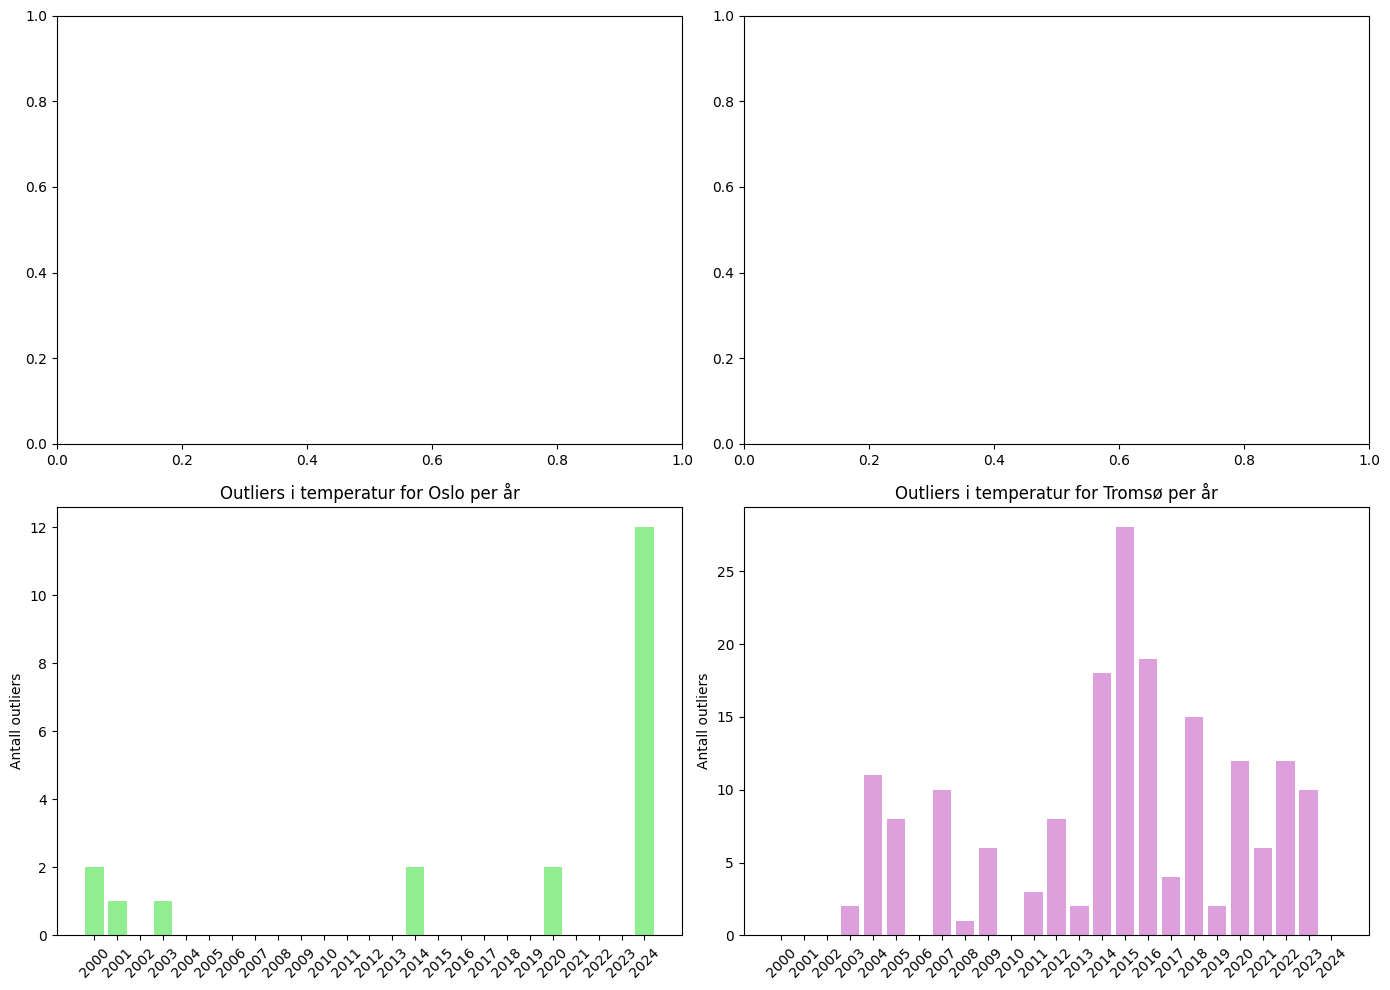

In [3]:
# Visualiser antall outliers per måned med stolpediagram
fig, ax = plt.subplots(2, 2, figsize=(14, 10), sharex=False)

# Oslo, årlig
ax[1, 0].bar(outliers_oslo_year.index.astype(str), outliers_oslo_year.values, color='lightgreen')
ax[1, 0].set_title('Outliers i temperatur for Oslo per år')
ax[1, 0].set_ylabel('Antall outliers')
ax[1, 0].tick_params(axis='x', rotation=45)

# Tromsø, årlig
ax[1, 1].bar(outliers_tromso_year.index.astype(str), outliers_tromso_year.values, color='plum')
ax[1, 1].set_title('Outliers i temperatur for Tromsø per år')
ax[1, 1].set_ylabel('Antall outliers')
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()